In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
file_path = "/content/drive/MyDrive/water_data.csv"

In [ ]:
# Read File
df = pd.read_csv(file_path)

print(df.head())

          well_id  depth_m trit_cat  pfas_sum  popdensity2000   n_sep2010  \
0     SURFPAS1-01     6.40   Modern       0.0             2.0    1.848226   
1  SOFLLUSRC1A-27     9.45      NaN       1.0          3141.0  505.221283   
2  SOFLLUSRC1A-14     4.57      NaN       1.0          2205.0  335.146779   
3  SOFLLUSRC1A-13     4.57   Modern       1.0          2205.0  319.569365   
4  SOFLLUSRC1A-15    15.24      NaN       1.0          2205.0  319.569365   

   dist_pfas_sites  nwalt2002_pcturb     dtw_m  rech48_mmyr   avg_clay  \
0     14854.443140          0.000000  0.138079         83.0  12.951220   
1       782.383171        100.000000  0.643119         96.0   2.731092   
2      2625.533181         90.836653  0.325101         91.0   4.077670   
3      1947.139651         95.275591  0.303890         91.0   4.036036   
4      1947.139651         95.275591  0.303890         91.0   4.036036   

   Unnamed: 11  Unnamed: 12  
0          NaN          NaN  
1          NaN          NaN  
2 

In [ ]:
# Preprocess/Clean data
print(df.isnull().sum())
# drop columns with only NA values or categorical features
df_clean = df.drop(['Unnamed: 11', 'Unnamed: 12', 'well_id', 'trit_cat'], axis = 1)
df_clean = df_clean.dropna()
print(df_clean.isnull().sum())

well_id                2
depth_m               12
trit_cat             119
pfas_sum               2
popdensity2000        19
n_sep2010             19
dist_pfas_sites       19
nwalt2002_pcturb      22
dtw_m                 22
rech48_mmyr           33
avg_clay              51
Unnamed: 11         1240
Unnamed: 12         1240
dtype: int64
depth_m             0
pfas_sum            0
popdensity2000      0
n_sep2010           0
dist_pfas_sites     0
nwalt2002_pcturb    0
dtw_m               0
rech48_mmyr         0
avg_clay            0
dtype: int64


In [ ]:
target = df_clean['pfas_sum']
feats = df_clean.drop('pfas_sum', axis = 1)
print(feats.head())

   depth_m  popdensity2000   n_sep2010  dist_pfas_sites  nwalt2002_pcturb  \
0     6.40             2.0    1.848226     14854.443140          0.000000   
1     9.45          3141.0  505.221283       782.383171        100.000000   
2     4.57          2205.0  335.146779      2625.533181         90.836653   
3     4.57          2205.0  319.569365      1947.139651         95.275591   
4    15.24          2205.0  319.569365      1947.139651         95.275591   

      dtw_m  rech48_mmyr   avg_clay  
0  0.138079         83.0  12.951220  
1  0.643119         96.0   2.731092  
2  0.325101         91.0   4.077670  
3  0.303890         91.0   4.036036  
4  0.303890         91.0   4.036036  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state = 32)

<Axes: >

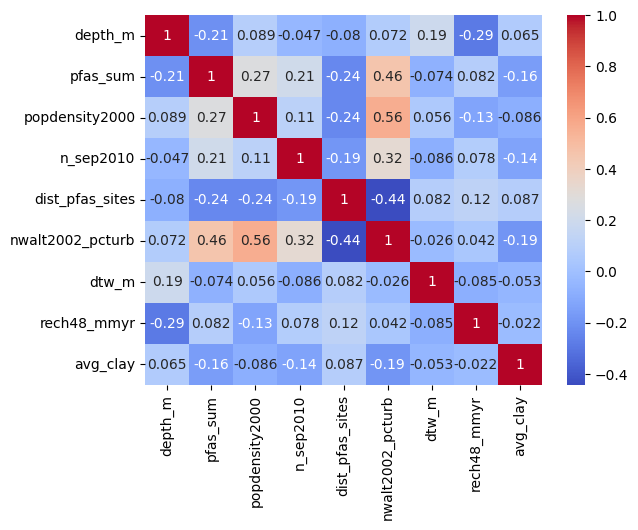

In [ ]:
correlation = df_clean.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

### Models

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(penalty="l2", solver="newton-cholesky", max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall_lr = recall_score(y_test, y_pred, average='macro')
acc_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='macro')

y_pred_train_lr = model.predict(X_train)
trainacc_lr = accuracy_score(y_train, y_pred_train_lr)

print(f"Logistic Regression (LR) Train Accuracy: {trainacc_lr}")
print(f"LR Test Accuracy: {acc_lr}")
print(f"LR Test Recall: {recall_lr}")
print(f"LR Test Precision: {precision_lr}")

Logistic Regression (LR) Train Accuracy: 0.7574468085106383
LR Test Accuracy: 0.7872340425531915
LR Test Recall: 0.7589568801521878
LR Test Precision: 0.7685352622061483


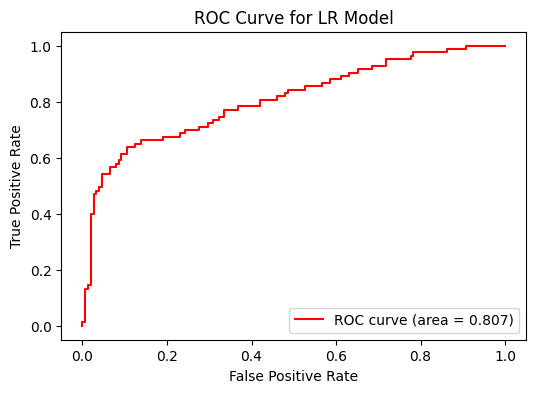

In [ ]:
y_score = model.fit(X_train, y_train).predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for LR Model")
plt.show()

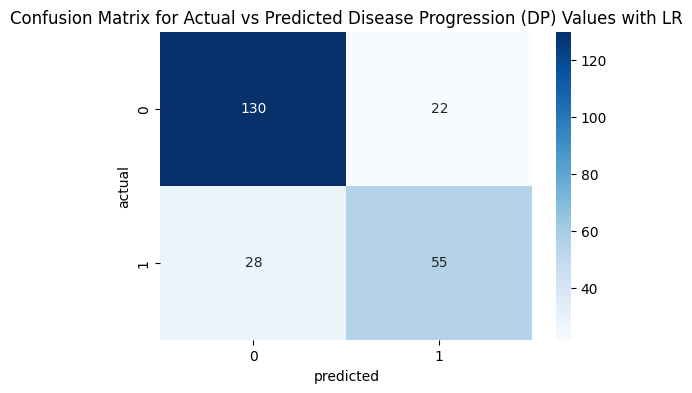

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted Disease Progression (DP) Values with LR")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#### Multivariable Regression

In [ ]:
from sklearn.linear_model import LinearRegression

MSE: 0.164
R^2 Score: 0.283


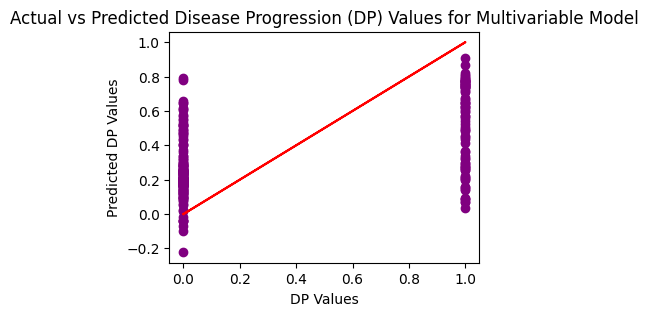

In [ ]:
# Multivariable Regression with nwalt2002_pcturb, popdensity, dist_pfas_sites, n_sep2010?? NOT GOOD because it's just yes or no (1, 0) not any value in between or > <
x_feats = df_clean[["nwalt2002_pcturb", "popdensity2000", "n_sep2010", "dist_pfas_sites", "depth_m", "avg_clay"]] # chose these features as they have highest correlated values to PFAS detection
y_target = df_clean["pfas_sum"].values

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_feats, y_target, test_size = 0.2)

model = LinearRegression()
model.fit(x_train_reg, y_train_reg)

y_pred = model.predict(x_test_reg)

mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)
print(f"MSE: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

plt.figure(figsize = (4,3))
plt.scatter(y_test_reg, y_pred, color = "purple")
plt.plot(y_test_reg, y_test_reg, color = "red")
plt.title("Actual vs Predicted Disease Progression (DP) Values for Multivariable Model")
plt.xlabel("DP Values")
plt.ylabel("Predicted DP Values")
plt.show()

#### Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
# svm
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
acc_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')

y_pred_train_svm = clf.predict(X_train)
trainacc_svm = accuracy_score(y_train, y_pred_train_svm)

print(f"Support Vector Machine Train Accuracy: {trainacc_svm}")
print(f"SVM Test Accuracy: {acc_svm}")
print(f"SVM Test Recall: {recall_svm}")
print(f"SVM Test Precision: {precision_svm}")

mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

Support Vector Machine Train Accuracy: 0.7127659574468085
SVM Test Accuracy: 0.7319148936170212
SVM Test Recall: 0.6423589093214965
SVM Test Precision: 0.7506979341150195


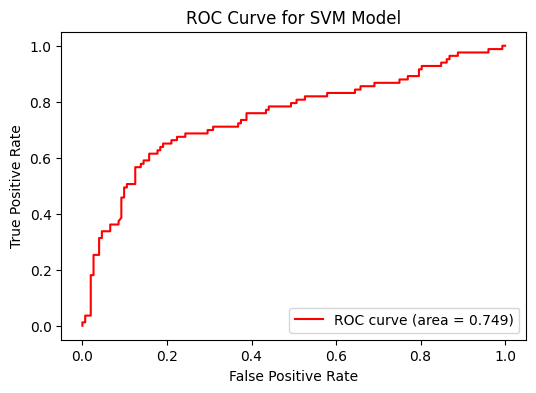

In [ ]:
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for SVM Model")
plt.show()

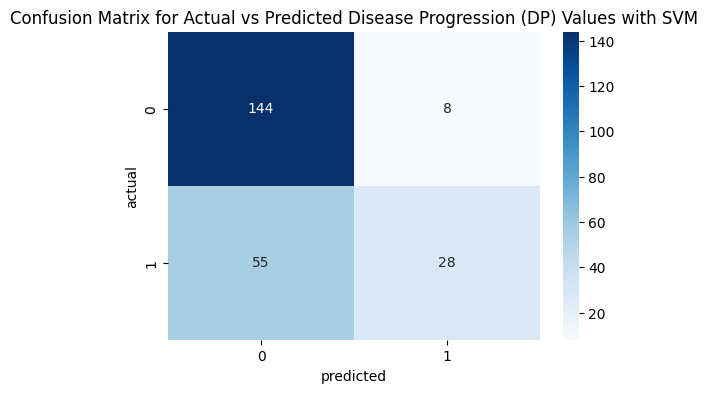

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted Disease Progression (DP) Values with SVM")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# decision tree
dtree = DecisionTreeClassifier(random_state=32)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')

y_pred_train_dt = dtree.predict(X_train)
trainacc_dt = accuracy_score(y_train, y_pred_train_dt)

print(f"Decision Tree (DT) Train Accuracy: {trainacc_dt}")
print(f"DT Test Accuracy: {acc_dt}")
print(f"DT Test Recall: {recall_dt}")
print(f"DT Test Precision: {precision_dt}")

Decision Tree (DT) Train Accuracy: 1.0
DT Test Accuracy: 0.6851063829787234
DT Test Recall: 0.6745402663284717
DT Test Precision: 0.6645002241147467


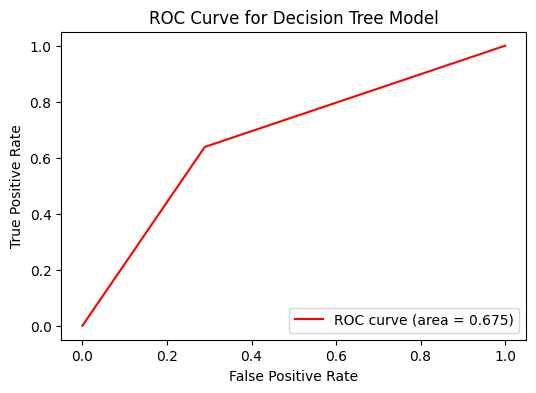

In [ ]:
y_score = dtree.fit(X_train, y_train).predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for Decision Tree Model")
plt.show()

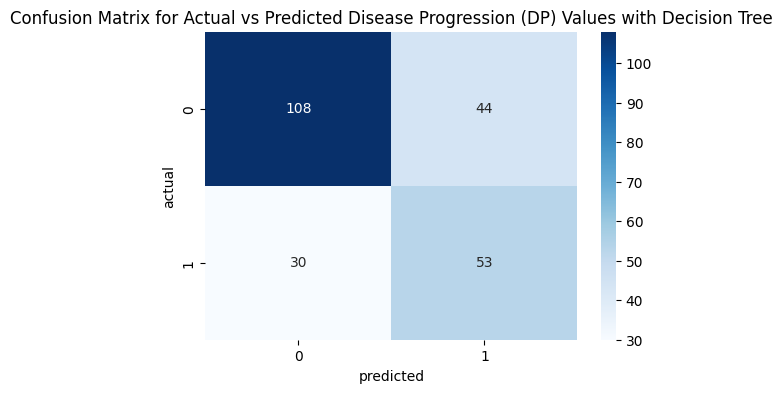

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted Disease Progression (DP) Values with Decision Tree")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#### Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# gradient boosting machine, used sklearn documentation
# PLOT ROC CURVES
# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.95, max_depth=1, random_state=32).fit(X_train, y_train)
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=32).fit(X_train, y_train)
y_pred_gbm = clf.predict(X_test)
recall_gbm = recall_score(y_test, y_pred_gbm, average='macro')
acc_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='macro')

y_pred_train_gbm = clf.predict(X_train)
trainacc_gbm = accuracy_score(y_train, y_pred_train_gbm)

print(f"Gradient Boosting Machine (GBM) Train Accuracy: {trainacc_gbm}")
print(f"GBM Test Accuracy: {acc_gbm}")
print(f"GBM Test Recall: {recall_gbm}")
print(f"GBM Test Precision: {precision_gbm}")

Gradient Boosting Machine (GBM) Train Accuracy: 0.8829787234042553
GBM Test Accuracy: 0.7872340425531915
GBM Test Recall: 0.7616915028535194
GBM Test Precision: 0.7678919182083739


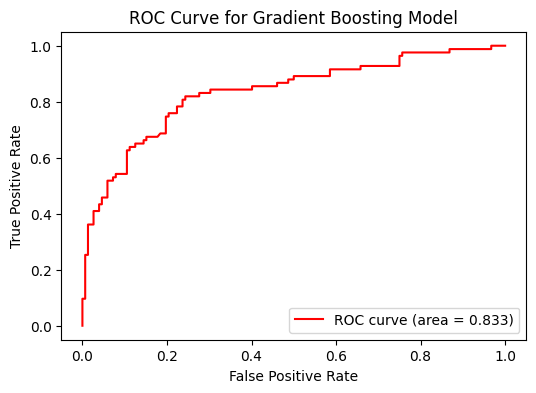

In [ ]:
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for Gradient Boosting Model")
plt.show()

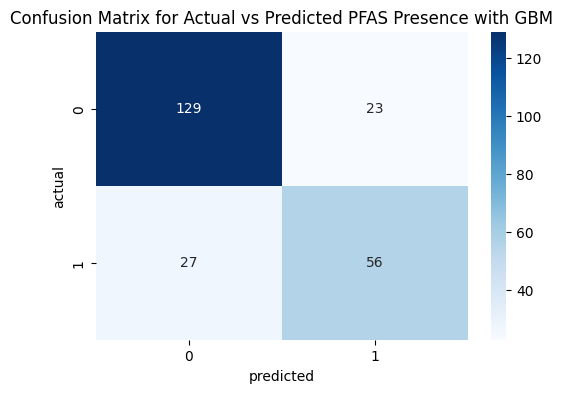

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbm)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted PFAS Presence with GBM")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
clf = GradientBoostingClassifier(n_estimators=30, learning_rate=0.09, random_state=32)
clf.fit(x_train_reg, y_train_reg)
y_pred_gbm = clf.predict(x_test_reg)
recall_gbm = recall_score(y_test_reg, y_pred_gbm, average='macro')
acc_gbm = accuracy_score(y_test_reg, y_pred_gbm)
precision_gbm = precision_score(y_test_reg, y_pred_gbm, average='macro')

y_pred_train_gbm = clf.predict(x_train_reg)
trainacc_gbm = accuracy_score(y_train_reg, y_pred_train_gbm)

print(f"Gradient Boosting Machine (GBM) Train Accuracy: {trainacc_gbm}")
print(f"GBM Test Accuracy: {acc_gbm}")
print(f"GBM Test Recall: {recall_gbm}")
print(f"GBM Test Precision: {precision_gbm}")

Gradient Boosting Machine (GBM) Train Accuracy: 0.8170212765957446
GBM Test Accuracy: 0.8212765957446808
GBM Test Recall: 0.7743341788205453
GBM Test Precision: 0.8260787638967402


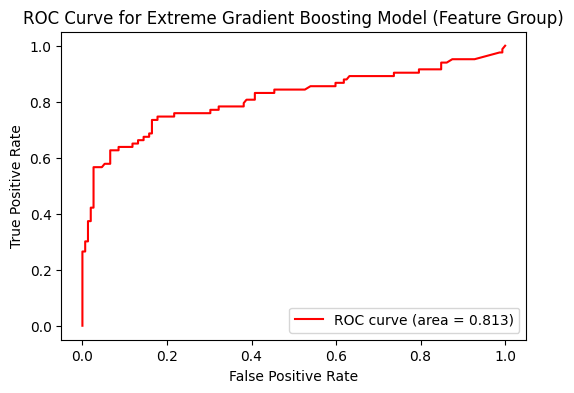

In [ ]:
y_score = clf.fit(x_train_reg, y_train_reg).predict_proba(x_test_reg)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_reg, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for Extreme Gradient Boosting Model (Feature Group)")
plt.show()

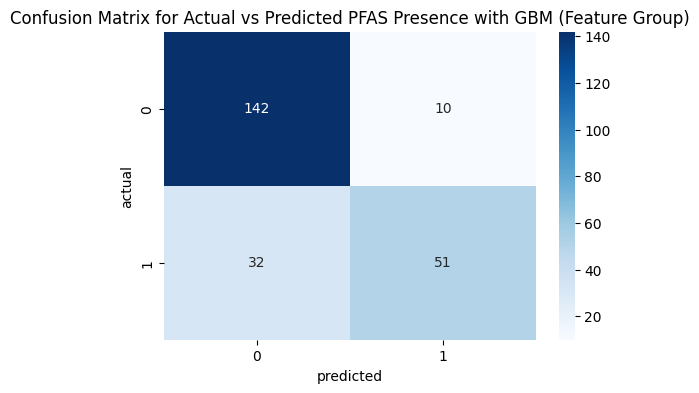

In [ ]:
cm = confusion_matrix(y_test_reg, y_pred_gbm)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted PFAS Presence with GBM (Feature Group)")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

#### Extreme Gradient Boosting Model

In [ ]:
import xgboost as xgb

In [ ]:
# xgboost
clf = xgb.XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=3, min_child_weight = 7, random_state=32)
clf.fit(X_train, y_train)
y_pred_xgb = clf.predict(X_test)
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')

y_pred_train_xgb = clf.predict(X_train)
trainacc_xgb = accuracy_score(y_train, y_pred_train_xgb)

print(f"X-Gradient Boosting Machine (GBM) Train Accuracy: {trainacc_xgb}")
print(f"XGB Test Accuracy: {acc_xgb}")
print(f"XGB Test Recall: {recall_xgb}")
print(f"XGB Test Precision: {precision_xgb}")

X-Gradient Boosting Machine (GBM) Train Accuracy: 0.8425531914893617
XGB Test Accuracy: 0.7872340425531915
XGB Test Recall: 0.7671607482561826
XGB Test Precision: 0.7671607482561826


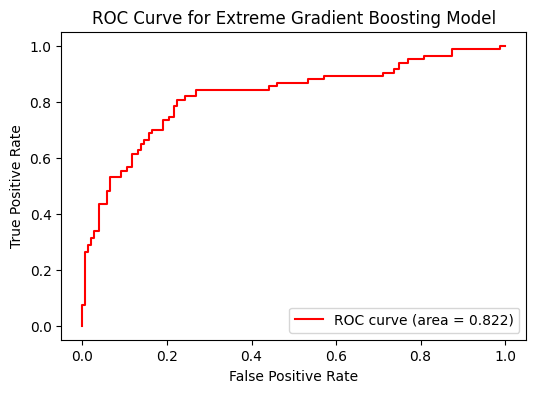

In [ ]:
y_score = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for Extreme Gradient Boosting Model")
plt.show()

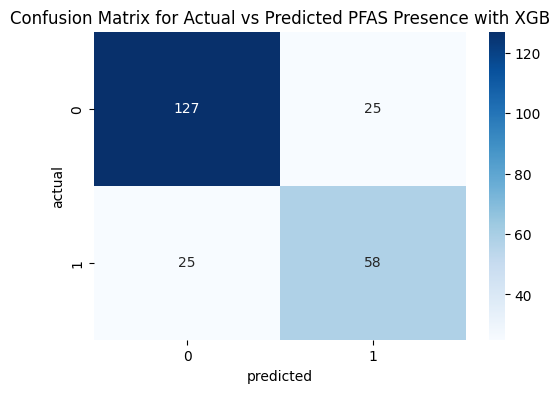

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted PFAS Presence with XGB")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [ ]:
# xgboost: XGB documentation + sklearn documentation
clf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.07, max_depth=3, min_child_weight = 7, random_state=32)
clf.fit(x_train_reg, y_train_reg)
y_pred_xgb = clf.predict(x_test_reg)
recall_xgb = recall_score(y_test_reg, y_pred_xgb, average='macro')
acc_xgb = accuracy_score(y_test_reg, y_pred_xgb)
precision_xgb = precision_score(y_test_reg, y_pred_xgb, average='macro')

y_pred_train_xgb = clf.predict(x_train_reg)
trainacc_xgb = accuracy_score(y_train_reg, y_pred_train_xgb)

print(f"X-Gradient Boosting Machine (XGB) Train Accuracy: {trainacc_xgb}")
print(f"XGB Test Accuracy: {acc_xgb}")
print(f"XGB Test Recall: {recall_xgb}")
print(f"XGB Test Precision: {precision_xgb}")

X-Gradient Boosting Machine (XGB) Train Accuracy: 0.8021276595744681
XGB Test Accuracy: 0.8212765957446808
XGB Test Recall: 0.7743341788205453
XGB Test Precision: 0.8260787638967402


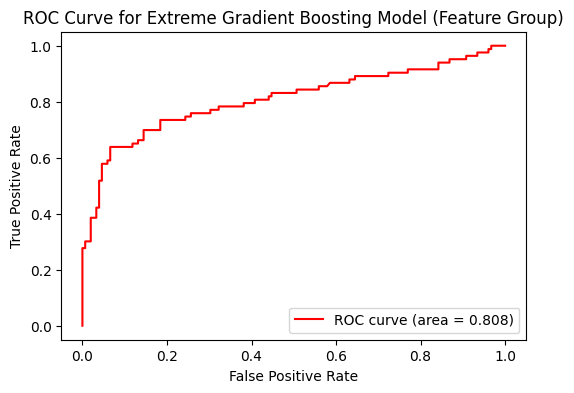

In [ ]:
y_score = clf.fit(x_train_reg, y_train_reg).predict_proba(x_test_reg)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_reg, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color = "red", label=f"ROC curve (area = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve for Extreme Gradient Boosting Model (Feature Group)")
plt.show()

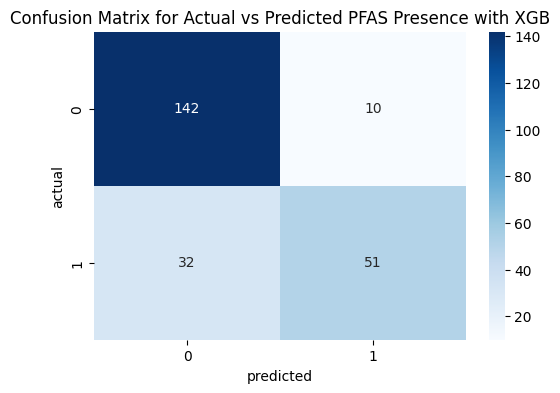

In [ ]:
cm = confusion_matrix(y_test_reg, y_pred_xgb)

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Actual vs Predicted PFAS Presence with XGB")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()